# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [6]:
def bivariada(df, resposta, explicativa):

    # Tabela cruzada básica
    crosstab = pd.crosstab(df[explicativa], df[resposta], margins=True, margins_name="Total")
    
    # Renomear colunas para maior clareza
    crosstab.columns = ['Saudáveis', 'Doentes', 'Total']
    
    # Média de doentes
    crosstab['Média Doentes'] = crosstab['Doentes'] / crosstab['Total']
    
    # Cálculo das Odds
    crosstab['Odds'] = crosstab['Doentes'] / crosstab['Saudáveis']
    
    # Odds Ratio em relação ao total
    odds_total = crosstab.loc['Total', 'Doentes'] / crosstab.loc['Total', 'Saudáveis']
    crosstab['Odds Ratio'] = crosstab['Odds'] / odds_total
    
    # Cálculo do Logito (LOG(Odds)) e Weight of Evidence (WOE)
    crosstab['Logito'] = np.log(crosstab['Odds'])
    crosstab['WOE'] = np.log(crosstab['Odds Ratio'])
    
    return crosstab.drop('Total')  # Retira o total para análise individual por grupo


In [7]:
variaveis_qualitativas = ['sex', 'cp', 'fbs']  # Escolha as variáveis qualitativas
resultados = {}

for var in variaveis_qualitativas:
    print(f"Analisando a variável '{var}':\n")
    bivariada_resultado = bivariada(df, resposta='flag_doente', explicativa=var)
    resultados[var] = bivariada_resultado
    print(bivariada_resultado)
    print("\n")


Analisando a variável 'sex':

     Saudáveis  Doentes  Total  Média Doentes      Odds  Odds Ratio   Logito  \
sex                                                                            
0.0         72       25     97       0.257732  0.347222    0.409672 -1.05779   
1.0         92      114    206       0.553398  1.239130    1.461996  0.21441   

          WOE  
sex            
0.0 -0.892398  
1.0  0.379802  


Analisando a variável 'cp':

     Saudáveis  Doentes  Total  Média Doentes      Odds  Odds Ratio    Logito  \
cp                                                                              
1.0         16        7     23       0.304348  0.437500    0.516187 -0.826679   
2.0         41        9     50       0.180000  0.219512    0.258993 -1.516347   
3.0         68       18     86       0.209302  0.264706    0.312315 -1.329136   
4.0         39      105    144       0.729167  2.692308    3.176536  0.990399   

          WOE  
cp             
1.0 -0.661286  
2.0 -1.350955  
3.0

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [8]:
def bivariada_continua(df, resposta, explicativa, n_grupos=5):
    # Categorizar a variável contínua em grupos utilizando pd.qcut
    df[f'{explicativa}_group'] = pd.qcut(df[explicativa], q=n_grupos, duplicates='drop')
    
    # Tabela cruzada básica
    crosstab = pd.crosstab(df[f'{explicativa}_group'], df[resposta], margins=True, margins_name="Total")
    
    # Renomear colunas para maior clareza
    crosstab.columns = ['Saudáveis', 'Doentes', 'Total']
    
    # Média de doentes
    crosstab['Média Doentes'] = crosstab['Doentes'] / crosstab['Total']
    
    # Cálculo do Odds
    crosstab['Odds'] = crosstab['Doentes'] / crosstab['Saudáveis']
    
    # Odds Ratio em relação ao total
    odds_total = crosstab.loc['Total', 'Doentes'] / crosstab.loc['Total', 'Saudáveis']
    crosstab['Odds Ratio'] = crosstab['Odds'] / odds_total
    
    # Cálculo do Logito (LOG(Odds)) e Weight of Evidence (WOE)
    crosstab['Logito'] = np.log(crosstab['Odds'])
    crosstab['WOE'] = np.log(crosstab['Odds Ratio'])
    
    # Calcular a média da variável contínua em cada grupo
    crosstab = crosstab.loc[crosstab.index != 'Total']  # Exclui a linha "Total" antes de atribuir a média
    crosstab['Média'] = df.groupby(f'{explicativa}_group')[explicativa].mean().values
    
    return crosstab



In [9]:
# Análise bivariada para a variável 'age'
resultado_age = bivariada_continua(df, resposta='flag_doente', explicativa='age', n_grupos=5)

# Exibindo os resultados
print(resultado_age)


                Saudáveis  Doentes  Total  Média Doentes      Odds  \
age_group                                                            
(28.999, 45.0]         47       16     63       0.253968  0.340426   
(45.0, 53.0]           42       22     64       0.343750  0.523810   
(53.0, 58.0]           32       39     71       0.549296  1.218750   
(58.0, 62.0]           13       32     45       0.711111  2.461538   
(62.0, 77.0]           30       30     60       0.500000  1.000000   

                Odds Ratio    Logito       WOE      Média  
age_group                                                  
(28.999, 45.0]    0.401653 -1.077559 -0.912166  41.222222  
(45.0, 53.0]      0.618020 -0.646627 -0.481235  50.000000  
(53.0, 58.0]      1.437950  0.197826  0.363218  56.211268  
(58.0, 62.0]      2.904261  0.900787  1.066179  60.355556  
(62.0, 77.0]      1.179856  0.000000  0.165392  66.516667  


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Preparação dos dados
df['sex'] = df['sex'].astype('category')       # Variável qualitativa
df['cp'] = df['cp'].astype('category')         # Variável qualitativa

# Fórmula do modelo
formula = "flag_doente ~ sex + cp + trestbps + age"

# Treinamento do modelo de regressão logística
modelo = smf.logit(formula, data=df).fit()

# Resumo dos resultados
modelo.summary()


Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                  0.3097
Time:                        10:07:07   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3407      1.621     -5.145      0.000     -11.518      -5.163
sex[T.1.0]     1.8094      0.353      5.130      0.000       1.118       2.501
cp[T.2.0]     -0.0617      0.636     -0.097      0.923      -1.309       1.186
cp[T.3.0]      0.0715      0.573      0.125      0.901      -1.051       1.194
cp[T.4.0]      2.4789      0.553      4.485      0.000       1.396       3.562
trestbps       0.0193      0.009      2.261      0.024       0.003       0.036
age            0.0567      0.018      3.120      0.002       0.021       0.092
==============================================================================
"""

In [15]:
# Calculando Odds Ratio

# Coeficiente variável sex
coef_sex = np.exp(1.8094)

# Coeficiente variável T.4
coef_t4 = np.exp(2.4789)

# Coeficiente variável tresbps
coef_tresbps = np.exp(0.0193)

# Coeficiente variável age
coef_age = np.exp(0.0567)

print(coef_sex,coef_t4,coef_tresbps,coef_age)

6.106782263431866 11.928136248806199 1.019487448979754 1.0583382612871293


### Variável `sex[T.1.0]`:
    
Possui coeficiente positivo no valor de 1.8094, o que significa que ser homem aumenta a probabilidade de ter a doença.
Considerando o Odds Ratio calculado anteriormente, os homens têm aproximadamente 6 vezes mais chances de ter a doença em relação às mulheres.

### Variável `cp` (Tipos de Dor no Peito):

cp[T.2.0] e cp[T.3.0] - Não são significativos (p-valor = 0.923 e 0.901, respectivamente), ou seja, esses tipos de dor no peito não têm impacto estatisticamente relevante no risco de doença.

cp[T.4.0] - Altamente significativo (p-valor < 0.001). Este tipo de dor aumenta muito a chance de doença cardíaca.
O Odds Ratio calculado indica que este tipo de dor está associado a uma chance de quase 12 vezes maior de ser diagnosticado com a doença cardíaca em comparação ao tipo base.

### Variável `trestbps` - Pressão Arterial de Repouso:
    
Apesar do coeficiente ser pequeno, é estatisticamente significativo, pois possui p-valor = 0.024, que é menor que 0.05.
De acordo com o odds ratio, há um aumento de 1.9% no risco para cada unidade adicional de pressão arterial.

### Variável `age`:

Altamente significativo (p-valor = 0.002).
Para cada aumento de 1 ano na idade, o odds ratio de ter a doença aumenta em 5.8%.


4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [25]:
# 1. Calcular a probabilidade de evento predita segundo o modelo
df['prob_evento_predita'] = modelo.predict(sm.add_constant(df[['sex', 'cp', 'trestbps', 'age']]))

# 2. Categorizar a probabilidade em 5 grupos
df['prob_grupo'] = pd.qcut(df['prob_evento_predita'], q=5, labels=[f'G{i+1}' for i in range(5)])

# 3. Calcular a probabilidade de evento predita média por grupo
prob_predita_media = df.groupby('prob_grupo')['prob_evento_predita'].mean()

# 4. Calcular a taxa de eventos (média da variável indicadora de eventos) por grupo
taxa_eventos_media = df.groupby('prob_grupo')['flag_doente'].mean()


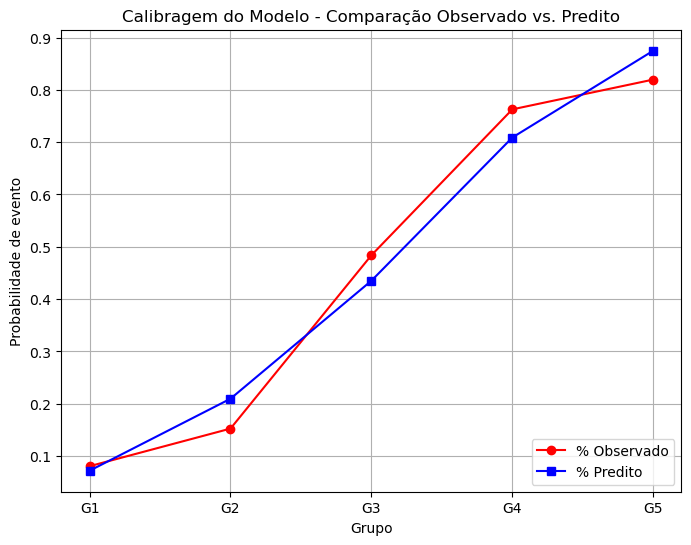

In [26]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

# Plotando os dados
ax = taxa_eventos_media.plot(label='% Observado', marker='o', color='red', linestyle='-')
ax = prob_predita_media.plot(label='% Predito', marker='s', color='blue', linestyle='-')

# Configuração dos ticks e rótulos no eixo X
ticks = ax.set_xticks(range(len(prob_predita_media)))
labels = ax.set_xticklabels([f'G{i+1}' for i in range(len(prob_predita_media))])

# Personalizações adicionais
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')
ax.set_title('Calibragem do Modelo - Comparação Observado vs. Predito')
ax.grid(True)

plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Calcular as probabilidades previstas usando o modelo do statsmodels
prob_pred = modelo.predict(df[['sex', 'cp', 'trestbps', 'age']])

# 2. Acurácia
# Previsões binárias com base em um threshold de 0.5
pred_binarias = (prob_pred >= 0.5).astype(int)
acuracia = accuracy_score(df['flag_doente'], pred_binarias)
print(f"Acurácia: {acuracia:.2%}")

# 3. GINI
# GINI = 2 * AUC - 1
auc = roc_auc_score(df['flag_doente'], prob_pred)
gini = 2 * auc - 1
print(f"GINI: {gini:.4f}")

# 4. KS
# Calculando as curvas ROC para determinar o KS
fpr, tpr, thresholds = roc_curve(df['flag_doente'], prob_pred)
ks = max(tpr - fpr)
print(f"KS: {ks:.2%}")


Acurácia: 79.54%
GINI: 0.7039
KS: 59.30%


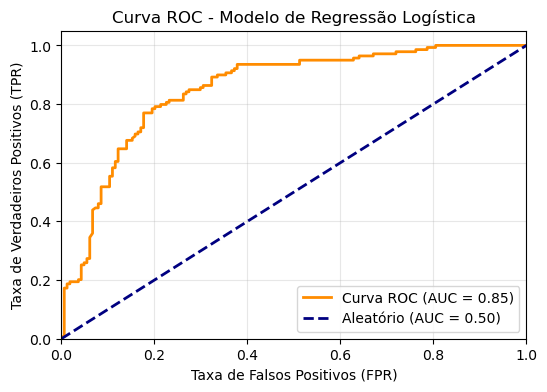

In [30]:
# Visualizando a curva ROC
from sklearn.metrics import roc_curve, auc

# Obter as probabilidades preditas pelo modelo (statsmodels)
prob_pred = modelo.predict(df[['sex', 'cp', 'trestbps', 'age']])

# Calcular FPR (False Positive Rate), TPR (True Positive Rate) e thresholds
fpr, tpr, thresholds = roc_curve(df['flag_doente'], prob_pred)

# Calcular AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(6, 4))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Aleatório (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Modelo de Regressão Logística')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


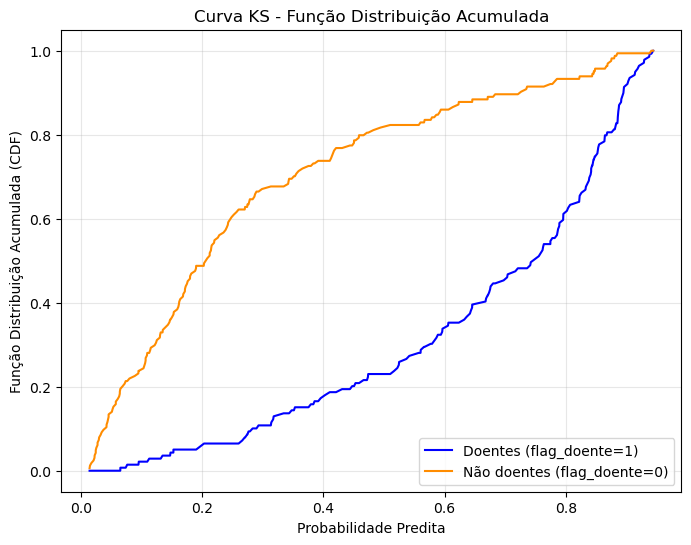

In [49]:
# Visualizando gráfico KS

import numpy as np
import matplotlib.pyplot as plt

# Prever probabilidades usando o modelo
prob_pred = modelo.predict(df[['sex', 'cp', 'trestbps', 'age']])

# Separar as probabilidades entre as duas populações: Doentes (1) e Não doentes (0)
score_pop1 = prob_pred[df['flag_doente'] == 1]  # Doentes
score_pop2 = prob_pred[df['flag_doente'] == 0]  # Não doentes

# Criar os thresholds para alinhar as distribuições
thresholds = np.sort(prob_pred)

# CDF para cada população avaliada nos mesmos thresholds
cdf_pop1 = np.searchsorted(np.sort(score_pop1), thresholds, side='right') / len(score_pop1)
cdf_pop2 = np.searchsorted(np.sort(score_pop2), thresholds, side='right') / len(score_pop2)

# Calcular o KS (maior distância entre as duas curvas)
ks_stat = np.max(np.abs(cdf_pop1 - cdf_pop2))

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(thresholds, cdf_pop1, label='Doentes (flag_doente=1)', color='blue')
ax.plot(thresholds, cdf_pop2, label='Não doentes (flag_doente=0)', color='darkorange')

# Configurações do gráfico
ax.set_title('Curva KS - Função Distribuição Acumulada')
ax.set_xlabel('Probabilidade Predita')
ax.set_ylabel('Função Distribuição Acumulada (CDF)')
ax.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


6. Tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [ ]:
# Recriando o modelo simplificando a variável cp_T4 e adicionando as variáveis 'chol' e 'fbs', que tratam do nível de colesterol e açúcar no sangue.

# Incluir as variáveis 'chol' e 'fbs' no conjunto de variáveis independentes
X = df[['sex', 'cp_T4', 'trestbps', 'age', 'chol', 'fbs']] 
X = sm.add_constant(X) 
y = df['flag_doente'] 

# Ajustar o modelo de regressão logística com as novas variáveis
modelo_ajustado = sm.Logit(y, X).fit()

# Exibir o resumo do modelo ajustado
modelo_ajustado.summary()


Optimization terminated successfully.
         Current function value: 0.472344
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                  0.3152
Time:                        12:06:15   Log-Likelihood:                -143.12
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 5.524e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.2800      1.630     -5.695      0.000     -12.474      -6.086
sex            1.9331      0.367      5.268      0.000       1.214       2.652
cp_T4          2.4601      0.309      7.974      0.000       1.855       3.065
trestbps       0.0182      0.009      2.117      0.034       0.001       0.035
age            0.0543      0.018      2.954      0.003       0.018       0.090
chol           0.0045      0.003      1.554      0.120      -0.001       0.010
fbs            0.0651      0.410      0.159      0.874      -0.737       0.868
==============================================================================
"""

In [42]:
# 1. Calcular a probabilidade de evento predita segundo o modelo
df['prob_evento_predita_ajust'] = modelo_ajustado.predict(sm.add_constant(df[['sex', 'cp_T4', 'trestbps', 'age', 'chol', 'fbs']]))

# 2. Categorizar a probabilidade em 5 grupos
df['prob_grupo_ajust'] = pd.qcut(df['prob_evento_predita_ajust'], q=5, labels=[f'G{i+1}' for i in range(5)])

# 3. Calcular a probabilidade de evento predita média por grupo
prob_predita_media_ajust = df.groupby('prob_grupo_ajust')['prob_evento_predita_ajust'].mean()

# 4. Calcular a taxa de eventos (média da variável indicadora de eventos) por grupo
taxa_eventos_media_ajust = df.groupby('prob_grupo_ajust')['flag_doente'].mean()

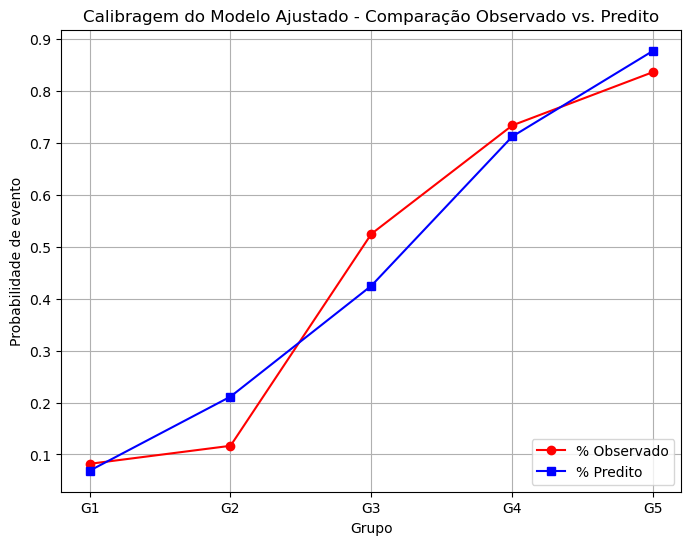

In [43]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

# Plotando os dados
ax = taxa_eventos_media_ajust.plot(label='% Observado', marker='o', color='red', linestyle='-')
ax = prob_predita_media_ajust.plot(label='% Predito', marker='s', color='blue', linestyle='-')

# Configuração dos ticks e rótulos no eixo X
ticks = ax.set_xticks(range(len(prob_predita_media_ajust)))
labels = ax.set_xticklabels([f'G{i+1}' for i in range(len(prob_predita_media_ajust))])

# Personalizações adicionais
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')
ax.set_title('Calibragem do Modelo Ajustado - Comparação Observado vs. Predito')
ax.grid(True)

plt.show()

Acurácia: 80.53%
Gini: 0.7117
KS: 0.5565


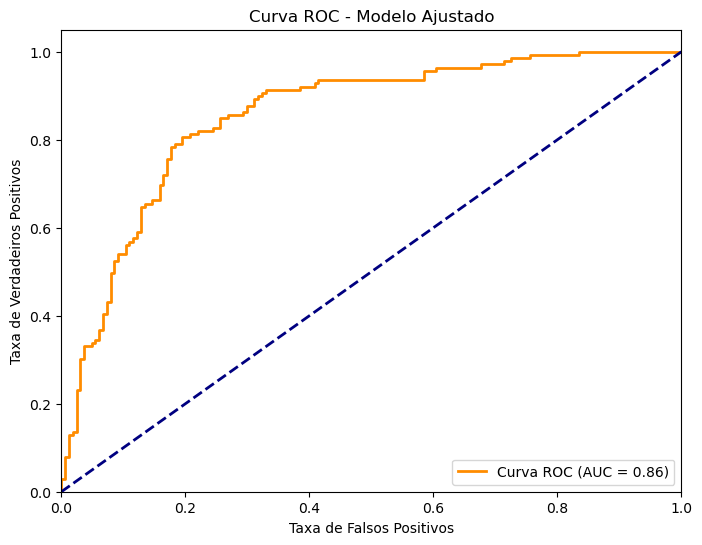

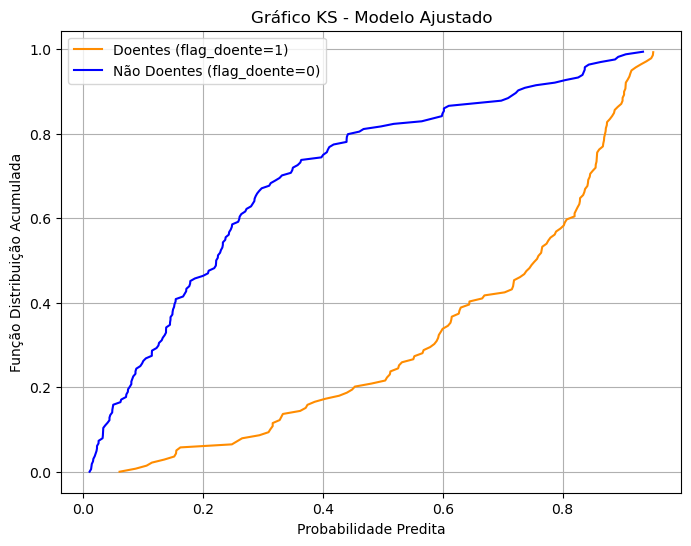

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

# 1. Calcular as probabilidades preditas
df['prob_evento_predita_ajust'] = modelo_ajustado.predict(sm.add_constant(df[['sex', 'cp_T4', 'trestbps', 'age', 'chol', 'fbs']]))

# 2. Calcular a Acurácia
# Previsões binárias com threshold 0.5
pred_binarias = (df['prob_evento_predita_ajust'] >= 0.5).astype(int)
acuracia = accuracy_score(df['flag_doente'], pred_binarias)
print(f"Acurácia: {acuracia:.2%}")

# 3. Calcular o GINI
# AUC é o valor da área sob a curva ROC
auc = roc_auc_score(df['flag_doente'], df['prob_evento_predita_ajust'])
gini = 2 * auc - 1
print(f"Gini: {gini:.4f}")

# 4. Calcular o KS (Kolmogorov-Smirnov)
# Ordenar as probabilidades para as classes 1 (doentes) e 0 (não doentes)
score_pop1 = df.loc[df['flag_doente'] == 1, 'prob_evento_predita_ajust']
score_pop2 = df.loc[df['flag_doente'] == 0, 'prob_evento_predita_ajust']

# Calcular as funções de distribuição acumulada (CDF) para as duas populações
cdf_pop1 = np.linspace(0, 1, len(score_pop1), endpoint=False)
cdf_pop2 = np.linspace(0, 1, len(score_pop2), endpoint=False)

# Ordenar os scores para cada população
sorted_pop1 = np.sort(score_pop1)
sorted_pop2 = np.sort(score_pop2)

# Interpolação para ajustar o número de pontos
# Vamos interpolar as distribuições para que elas tenham o mesmo número de pontos
interp_pop1 = np.interp(np.linspace(0, 1, len(sorted_pop2)), np.linspace(0, 1, len(sorted_pop1)), sorted_pop1)
interp_pop2 = np.sort(sorted_pop2)

# Calcular a maior distância (KS)
ks_stat = np.max(np.abs(interp_pop1 - interp_pop2))
print(f"KS: {ks_stat:.4f}")

# 5. Visualizar a Curva ROC
fpr, tpr, thresholds = roc_curve(df['flag_doente'], df['prob_evento_predita_ajust'])
auc_ = roc_auc_score(df['flag_doente'], df['prob_evento_predita_ajust'])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Modelo Ajustado')
plt.legend(loc="lower right")
plt.show()

# 6. Visualizar o Gráfico KS
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

# Função distribuição acumulada (CDF) para os sobreviventes e não sobreviventes
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doentes (flag_doente=1)', color='darkorange')
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Não Doentes (flag_doente=0)', color='blue')

# Adicionar a linha do KS
#ax.axvline(x=ks_stat, color='green', linestyle='--', label=f'KS = {ks_stat:.2f}')

# Configurações do gráfico
ax.legend()
ax.set_xlabel('Probabilidade Predita')
ax.set_ylabel('Função Distribuição Acumulada')
ax.set_title('Gráfico KS - Modelo Ajustado')
plt.grid(True)
plt.show()


Com a implementação do novo modelo com mais variáveis, tivemos uma pequena melhora na acuracidade. Isso se deve ao fato de que, com mais variáveis, é possível verificar outras relações e influências que não estávamos levando em consideração no modelo anterior. Com mais variáveis, o modelo conseguiu caracterizar cada grupo com maior precisão. 